<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to the Central Limit Theorem

_Authors: Matt Brems (DC), Kiefer Katovich (SF), Elaina Hyde (SYD)_

---

### Learning Objectives
- Understand the Normal distribution and the concept of normality.
- Visualize the normal distribution.
- Understand the uses of the 68-95-99.7 rule and the z-score.
- Visualize the 68-95-99.7 rule.
- Apply z-scoring to data.
- Understand and apply the Central Limit Theorem.
- Visualize the CLT.

### Lesson Guide
- [Review of Sample Statistics and Parameters](#review-statistics-parameters)
- [The Normal Distribution](#normal-distribution)
- [The 68-95-99.7 Rule](#zdist-rule)
- [The Z-Score](#z-score)
- [The Central Limit Theorem](#central-limit-theorem)
- [Visualizing the CLT](#visualizing-clt)
- [Additional Resources](#additional-resources)


In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='review-statistics-parameters'></a>

### Review: sample statistics and parameters

---

Recall that we use sample statistics to estimate population parameters. Our goal is to calculate sample statistics and then rely on properties of a random sample (and perhaps additional assumptions) to make inferences that we can generalize to the larger population of interest.

Below is a table comparing some example sample statistics and population parameters:

Metric  | Statistic  | Parameter 
-------- | ---------- | -------- 
mean   | $$\bar{x} = \frac{\sum x}{n}$$ | $$ \mu = \frac{\sum x}{N} $$      
standard deviation   | $$ s = \sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}} $$ | $$ \sigma = \sqrt{\frac{\sum_i (x_i - \mu)^2}{N} } $$
correlation   | $$ r = \frac{\hat{Cov}(X, Y)}{s_X s_Y} $$ | $$ \rho = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} $$

<a id='normal-distribution'></a>

### The Normal distribution

---

The normal distribution is arguably the most commonly used distribution in all of statistics. **Normality** is an assumption that underlies many statistical tests and serves as a convenient model for the distribution of many (but not all!) variables.

The normal distribution relies on two parameters: 
- The population mean
- The population standard deviation. 

If a variable follows a Normal distribution exactly, its mean, median, and mode will all be equal.

**Example: Intelligence Quotient**

Intelligence Quotient (IQ) follows a Normal distribution by design. IQ is Normally distributed with a mean of 100 and a standard deviation of 15. You might see this specified like:
- IQ ~ Normal(100,15) 
- or IQ ~ N(100,15)

**We can plot the normal distribution N(100, 15) using `scipy`.**

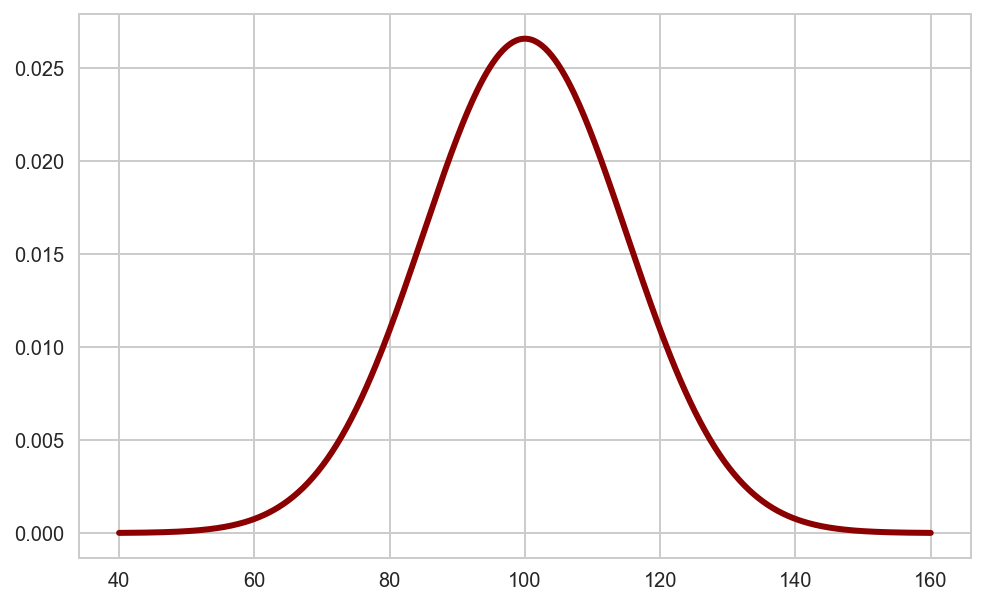

In [3]:
# Generate points on the x axis:
xpoints = np.linspace(40, 160, 500)

# Use stats.norm.pdf to get values on the probability density function for the Normal distribution
ypoints = stats.norm.pdf(xpoints, 100, 15)

# initialize a matplotlib "figure":
fig, ax = plt.subplots(figsize=(8,5))

# Plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

<a id='zdist-rule'></a>

### The 68-95-99.7 Rule

---

It is often beneficial to identify how extreme (or far away from the expected value) a particular observation is within the context of a distribution. 

For example, an extreme stock price might indicate a major shift in the market. This might inform whether we choose to buy or sell. Or, an extreme drop in air pressure might indicate a significant weather event, necessitating a reaction from the National Weather Service. Quantifying just how extreme a particular observation is from the expected value (a.k.a., population mean) may indicate a particular action we should take.

It is possible to show that, for a Normal distribution:
- 68% of observations from a population will fall within $\pm 1$ standard deviation of the population mean.
- 95% of observations from a population will fall within $\pm 2$ standard deviations of the population mean.
- 99.7% of observations from a population will fall within $\pm 3$ standard deviations of the population mean.

**Check:** What percentage of individuals have an IQ between 85 and 115?

**Check:** What percentage of individuals have an IQ above 100?

**Check:** What percentage of individuals have an IQ between 85 and 130?

**Below is a visual representation of the 68-95-99.7 rule on the IQ distribution:**

(99.953325408910828, 15.040402781407453)


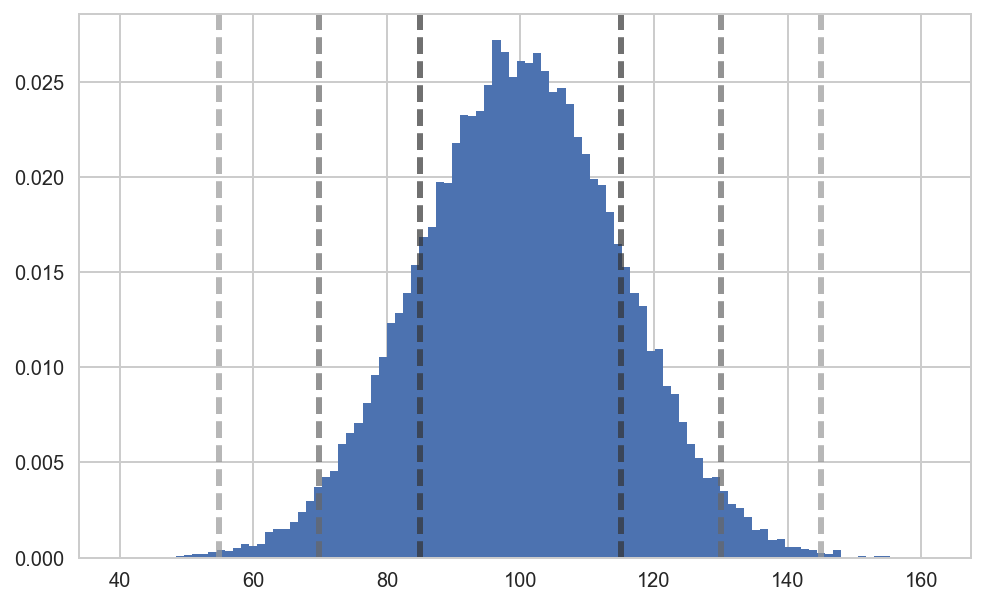

In [4]:
#Set mean and standard deviation
mu, sigma = 100, 15

#Here is a set of points
xpoints=np.random.normal(mu, sigma, 50000)

avg=np.mean(xpoints)
std=np.std(xpoints)

#check your values
print(avg,std)

#Define variables for 1,2,3 sigma
std1 = avg + std
std1_neg = avg - std
std2 = avg + 2*std
std2_neg = avg - 2*std
std3 = avg + 3*std
std3_neg = avg - 3*std

#Start Figure
#---------------------------------------
# Initialize a matplotlib "figure"
fig, ax = plt.subplots(figsize=(8,5))

# 68%:
ax.axvline(std1_neg, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(std1, ls='dashed', lw=3, color='#333333', alpha=0.7)

# 95%
ax.axvline(std2_neg, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(std2, ls='dashed', lw=3, color='#666666', alpha=0.7)

# 99.7%
ax.axvline(std3, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(std3_neg, ls='dashed', lw=3, color='#999999', alpha=0.7)

# plot the lines using matplotlib's hist function:
ax.hist(xpoints,normed=True, bins=100)
plt.show()

<a id='z-score'></a>

### The z-score

---

While it's nice to have this 68-95-99.7 rule, we can get more specific. 

**The z-score of an observation quantifies how many standard deviations the observation is away from the population mean:**

### $$ z_i = \frac{x_i - \text{population mean of x}}{\text{standard deviation of x}} $$

If we have **X ~ N(mu, sigma)**, with the random variable $X$ specified by a normal distribution with mean $mu$ and standard deviation $sigma$, we can specify the z-distribution as  **Z ~ N(0,1)**. 

We call $Z$ the **standard normal distribution** because it has a mean of 0 and standard deviation of 1.

The `scipy.stats.zscore` function will convert a vector of values to their respective z-scores.

**Calculate the z-scores for a simple vector of values:**

In [1]:
import numpy as np
values = np.array([2,3,4,5,6])


**Check: Describe how the `scipy.stats.zscore` function converts the vector of values.**

In [5]:
# A:

**Check:** If $X$ is not normal, but we calculate $Z$ by standardizing $X$ using the mean and standard deviation of $X$ as above, is Z ~ N(0,1)?

In [6]:
# A:

<a id='central-limit-theorem'></a>

### Central Limit Theorem

---

Normality underlies many of the inferential techniques that we will use in this course. It is important for us to determine when we've met the condition of normality.

Consider the random variable $X$. We can take a sample from this population of size $n$ and find the mean of that sample. Let's call this sample mean $x_1$. We can take another sample from this population, also of size $n$, and find the mean of that sample. Let's call this sample mean $x_1$. We can do this over and over until we've calculated the mean of every possible sample of size $n$. If we plotted every sample mean on a histogram, we get another distribution called "the sampling distribution of $\bar{X}$."

**This distribution, the sampling distribution of $\bar{X}$, is Normally distributed even if the distribution of $X$ is not.** (That is, unless some rare conditions are violated).

We can formally define [the central limit theorm](http://homepages.math.uic.edu/~bpower6/stat101/Sampling%20Distributions.pdf) like so:

> In probability theory, the central limit theorem (CLT) states that, when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve), even if the original variables themselves are not normally distributed. In more precise terms, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables — each with a well-defined (finite) expected value and finite variance — will be approximately normally distributed, regardless of the underlying distribution.

Some properties that arise from the central limit theorem include:

> If $X ~ N(\mu,\sigma)$, then $\bar{X}$ is exactly $N(\mu,\frac{\sigma}{\sqrt{n}})$

> If $X$ is not normally distributed, then $\bar{X}$ is approximately $N(\mu,\frac{\sigma}{\sqrt{n}})$ if the sample size $n$ is at least 30. As $n$ increases, $\bar{X}$ becomes asymptotically normally distributed.

> If $\bar{X}$ is normally distributed, then we can use inferential methods that rely on our sample mean, $\bar{x}$

<a id='visualizing-clt'></a>

### Visualizing the CLT: athlete salary data

---

Below is the path to a `.csv` with a variety of data on today's highest paid athletes. Many of the variables measured in the data set are far from normally distributed. We will show that, despite this fact, the distribution of sample means for these variables will be asymptotically normally distributed, as proven by the CLT.

> **NOTE:** The code below uses the pandas package to load the data into a pandas DataFrame and extract the salary information. If this is unfamiliar, you can safely ignore this part of the code for now.

**We will  now load in the salary data for athletes and extract the total pay information as a variable.**

In [7]:
athletes_csv = 'datasets/Athletes.csv'

import pandas as pd
ath = pd.read_csv(athletes_csv)
salary = ath['Total Pay'].values.tolist()

**The list of salary information currently contains strings. Clean the salary list and convert these into floats.**

In [2]:
# Clean the data - convert to float

**Below is a function that will plot a distribution (as a list of numbers). Plot the salary information using this function.**

Is the salary for these athletes normally distributed?

In [11]:
def dist_plotter(sample):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.distplot(sample, bins=50, kde=False)
    plt.show()

In [3]:
# Plot the salary data:

**Write a function that will take a random sample of size $n=30$ from this salary list 1000 times, calculate the means of the samples, and return the sample means as a new list.**

*Hint: you can use `numpy`'s `np.random.choice` to perform your sampling.*

In [4]:
# Write the sample mean function:

**Plot the sample means using the distribution plotter function.**

Is the distribution of sample means approximately normally distributed? What happens if you increase the number of sample means to 10,000? 100,000?

In [5]:
# Plot the sample means

<a id='additional-resources'></a>

### Additional resources

---

http://blog.vctr.me/posts/central-limit-theorem.html

http://www.usablestats.com/lessons/central_limit

http://blog.minitab.com/blog/michelle-paret/explaining-the-central-limit-theorem-with-bunnies-and-dragons-v2
